In [1]:
import numpy as np 
import scipy.stats
import pylab as plt     
import sklearn
from sklearn.mixture import GaussianMixture

In [2]:
random_state = np.random.RandomState(seed=10) #for reproducibility

Shape: (2950, 1)


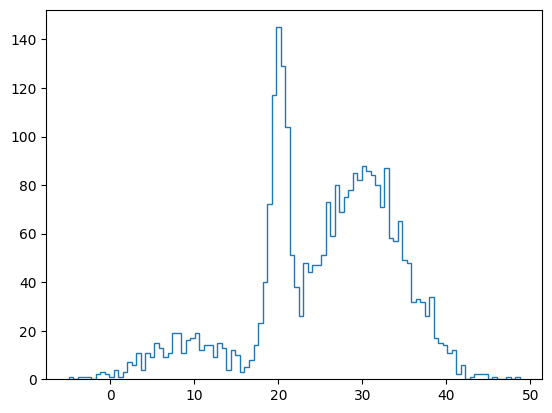

In [3]:
data = np.load('formationchannels.npy')
print('Shape:', (data).shape)
plt.hist(data,bins=100,histtype='step')
plt.show()

I think I see 3 modes. Let's check it

[20945.97260859 20753.49600712 20083.17588427 20091.73554278
 20112.90639926 20124.54289461 20128.28546641 20132.19927865
 20141.70946982 20139.83371324]


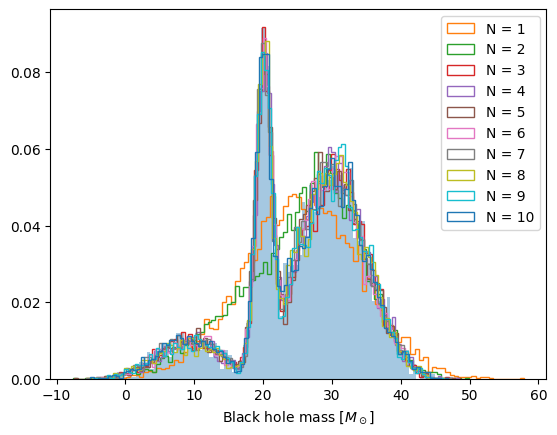

In [4]:
ncomp_arr = np.linspace(1,10,10).astype(int)
AIC = np.zeros(10)

x0 = np.linspace(0,50,1000)
x = x0[:,np.newaxis]
n_sample = 10000

plt.hist(data, bins=100, density=True, alpha=0.4)

for n in ncomp_arr:
    model = GaussianMixture(n_components=n)
    gm = model.fit(data)
    samples = gm.sample(n_sample)
    plt.hist(samples[0], bins=100, density=True, histtype='step', label="N = "+str(n))
    AIC[n-1] = gm.aic(data)
    
print(AIC)

plt.xlabel(r'Black hole mass $[M_\odot]$')
plt.legend()
plt.show()

#### Better
#fit models with 1-10 components

N = np.arange(1, 10)

models = [None for i in range(len(N))]

for i in range(len(N)):

    models[i] = GaussianMixture(N[i]).fit(X)


AIC = [m.aic(X) for m in models]

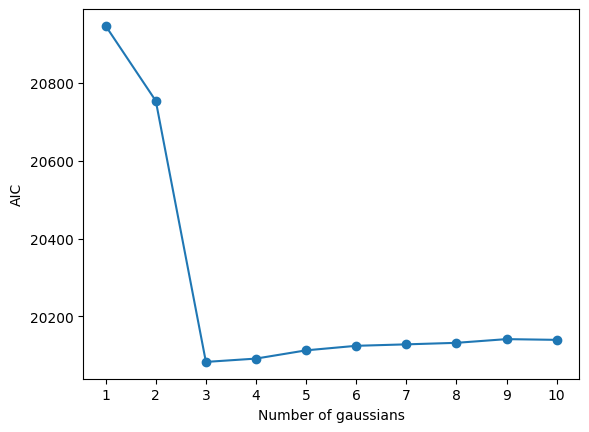

In [5]:
plt.plot(ncomp_arr, AIC)
plt.scatter(ncomp_arr, AIC)

plt.xlabel('Number of gaussians')
plt.ylabel('AIC')
plt.xticks(range(min(ncomp_arr), max(ncomp_arr) + 1))

plt.show()

In [6]:
print('The AIC is minimized for N =', ncomp_arr[np.argmin(AIC)])

The AIC is minimized for N = 3


### 3 gaussian model

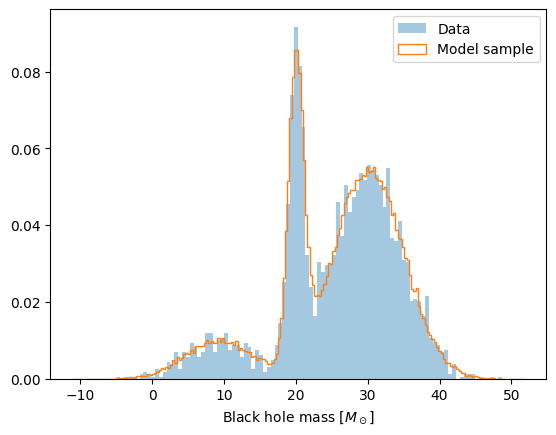

In [7]:
ncomponents = 3

model = GaussianMixture(n_components=ncomponents)
gm = model.fit(data)

n_sample = 100000
samples = gm.sample(n_sample)
#print(samples)

plt.hist(data, bins=100, density=True, alpha=0.4, label='Data')
plt.hist(samples[0], bins=200, density=True, histtype='step', label='Model sample')

plt.xlabel(r'Black hole mass $[M_\odot]$')
plt.legend()
plt.show()

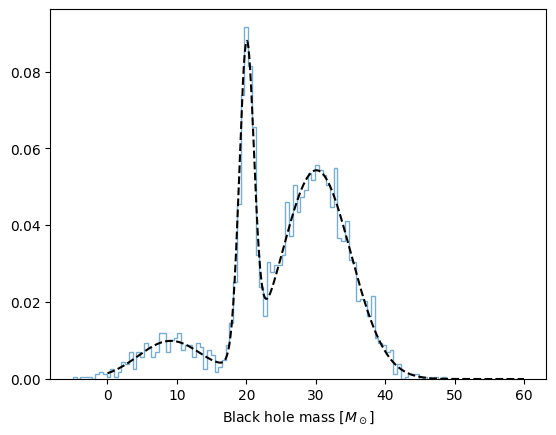

In [8]:
xi = np.linspace(0, 60, 1000)
x = xi[:,np.newaxis]

logprob = model.score_samples(x)
pdf = np.exp(logprob)

plt.hist(data, bins=100, density=True, histtype='step', alpha=0.6)

plt.plot(x, pdf, "--k")

plt.xlabel(r'Black hole mass $[M_\odot]$')
plt.show()

#### Single modes

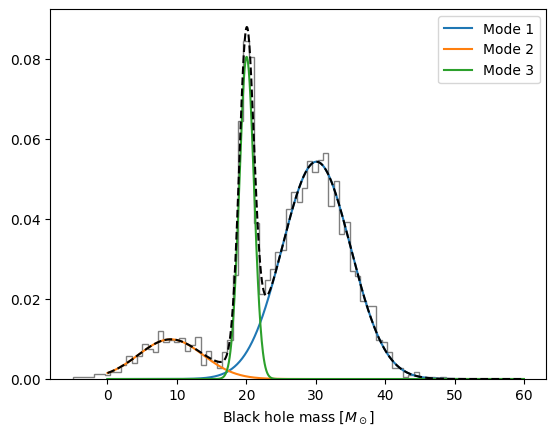

In [9]:
responsibilities = model.predict_proba(x)
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.hist(data, 70, density=True, histtype='step', alpha=0.5, color='black')
plt.plot(x, pdf_individual[:,0],label="Mode 1")
plt.plot(x, pdf_individual[:,1],label="Mode 2")
plt.plot(x, pdf_individual[:,2],label="Mode 3")
plt.plot(x, pdf, '--k')

plt.xlabel(r'Black hole mass $[M_\odot]$')
plt.legend()
plt.show()

Let's take a look at the responsibilities

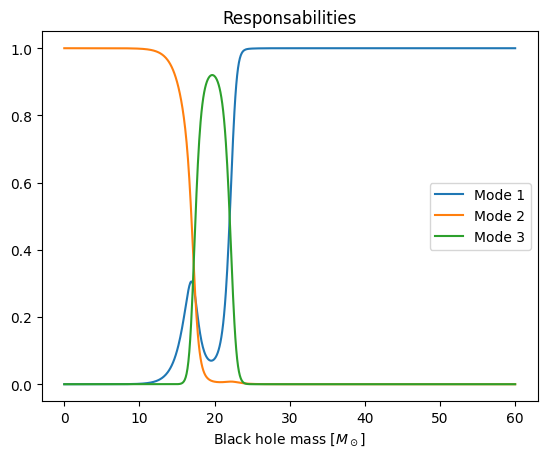

In [10]:
plt.plot(xi,responsibilities[:,0],label="Mode 1")
plt.plot(xi,responsibilities[:,1],label="Mode 2")
plt.plot(xi,responsibilities[:,2],label="Mode 3")

plt.title('Responsabilities')
plt.xlabel(r'Black hole mass $[M_\odot]$')
plt.legend()
plt.show()